[View in Colaboratory](https://colab.research.google.com/github/JozeeLin/google-tensorflow-exercise/blob/master/feature_engineering.ipynb)

## 特征工程
传统编程的关注点是代码。在机器学习项目中，关注点变成了表示。也就是说，开发者通过添加和改善特征来调整模型。
<br>
### 映射数值
机器学习模型根据浮点值进行训练，因此整数和浮点原始数据不需要特殊编码。比如，把原始整数值6转换为特征值6.0是没有意义的。
### 映射字符串值
模型无法通过字符串值学习规律，因此需要进行一些特征工程来将这些值转换为数字形式:
1. 首先，为要表示的所有特征的字符串值定义一个词汇表。对于street_name特征，该词汇表中将包含样本集中设计的所有街道
2. 然后，使用该词汇表创建一个独热编码，用于将指定字符串值表示为二元矢量
### 映射分类(枚举)值
分类特征具有一组离散的可能值。比如，<br>
名为```Lowland Countries```的特征只包含3个可能值: {'Netherlands', 'Belgium', 'Luxembourg'}
<br>
你可以把以上分类特征编码为枚举类型或表示不同值得整数离散集。例如:
- 将荷兰表示为0
- 将比利时表示为1
- 将卢森堡表示为2
不过，机器学习模型通常将每个分类特征表示为单独的布尔值。例如，```Lowland Countries```在模型中可以表示为3个单独的布尔值特征:
- x_1:是荷兰吗?
- x_2:是比利时吗？
- x_3:是卢森堡吗?
采用这种方法编码还可以简化某个值可能属于多个分类这种情况(例如，"与法国接壤"对于比利时和卢森堡来说都是True)

## 良好特征的特点
> 探索什么样的值才算这些特征矢量中良好的特征。
### 避免很少使用的离散特征值
良好的特征值应该在数据集中出现**大约5次以上**。这样一来，模型就可以学习该特征值与标签是如何关联的。也就是说，大量离散值相同的样本可让模型有机会了解不同设置中的特征，从而判断何时可以对标签很好的做出预测。例如，house_type特征可能包含大量样本，其中它的值为victorian：
<br>
相反，如果某个特征的值仅出现一次或者很少出现，则模型就无法根据该特征进行预测。例如，```unique_house_id```就不适合作为特征，因为每个值只使用一次，模型无法从中学习任何规律:
<br>
### 最好具有清晰明确的含义
每个特征对于项目中的任何人来说都应该具有明确的含义。例如，下面的房龄适合作为特征，可立即识别为年龄:house_age:27
<br>
相反，对于下方特征值得含义，除了创建它的工程师，其他人恐怕辨识不出: house_age:851472000
<br>
在某些情况下，混乱的数据(而不是糟糕的工程选择)会导致含义不清晰的值。例如，如下user_age的来源没有检查值恰当与否:user_age:277
### 不要将"神奇"的值与实际数据混为一谈
良好的浮点特征不包含超出范围的异常断点或"神奇"的值。例如，假设一个特征具有0到1之间的浮点值。那么，如下值是可以接受的:
<br>
```
quality_rating:0.82
quality_rating:0.37
```
不过，如果用户没有输入quality_rating,则数据集可能使用如下神奇值来表示不存在该值:
<br>
quality_rating:-1
<br>
为解决神奇值得问题，需将该特征转换为两个特征:
- 一个特征只存储质量评分，不含神奇值
- 一个特征存储布尔值，表示是否提供了quality_rating。该布尔值特征指定一个名称，例如is_quality_rating_defined
### 考虑上游不稳定性
特征的定义不应随时间发生变化。例如，下列值是有用的，因为城市名称一般不会改变。(注意，我们仍然需要将"br/sao_paulo"这样的字符串转换为独热矢量。)
<br>
city_id:"br/sao_paulo"
<br>
但收集由其他模型推理的值会产生额外成本。可能值"219"目前代表圣保罗，但这种表示在未来运行其他模型是可能轻易发生变化:
<br>
inferred_city_cluster:"219"

## 清理数据
作为一名机器学习工程师，您将花费大量的时间挑出坏样本并加工可以挽救的样本。即使是非常少量的怀样本也会破坏掉一个大规模数据集
###缩放特征值
缩放是指将浮点特征值从自然范围(例如100到900)转换为标准范围(例如0到1或-1到+1)。如果某个特征值只包含一个特征，则缩放可以提供的实际好处微乎其微或根本没有。不过，如果特征集包含多个特征，则缩放特征可以带来以下优势:
- 帮助梯度下降法更快更速地收敛
- 帮助避免"NaN陷阱"。在这种陷阱中，模型中的一个数值变成NaN(例如，当某个值在训练期间超出浮点精确率限制时)，并且模型中的所有其他数值最终也会因数学运算而变成NaN
- 帮助模型为每个特征确定合适的权重。如果没有进行特征缩放，则模型会对范围较大的特征投入过多精力
### 处理极端离群值
下面的曲线图表示的是加利福尼亚州住房数据集中称为roomsPerPerson的特征。roomsPerPerson值的计算方法是相应地区的房间总数除以相应地区的人口总数。该曲线图显示，在加利福尼亚州州的绝大部分地区，人均房间数为1到2间。
<br>
如何最大限度降低那些极端离群值的影响?一种方法是对每个值取对数.
<br>
对数缩放可稍稍缓解这种影响，但仍然存在离群值这个大尾巴。还可以采用另一种方法。如果我们只是简单的将roomsPerPerson的最大值"限制"为某个任意值(比如4.0)，会发生什么情况呢?
<br>
将特征值限制到4.0并不意味着我们会忽略所有大于4.0的值。而是说，所有大于4.0的值都将变成4.0.这就解释了4.0处的那个有趣的小峰值。**尽管存在这个小峰值，但是缩放后的特征集现在依然比原始数据有用.**
### 分箱(分段离散化)
下面的曲线图显示了加利福尼亚州不同维度的房屋相对普及率。注意集群-洛杉矶大致在维度34处，旧金山大致维度38处。
<br>
在数据集中，latitude是一个浮点值。不过，在我们的模型中将latitude表示为浮点特征没有意义。这是因为维度和房屋价值之间不存在线性关系。例如，维度35处的房屋并不比维度34处的房屋贵35/34(或更便宜)。但是维度或许能更好的预测房屋价值。
<br>
为了将维度变为一项实用的预测指标，我们对纬度"分箱",如下图所示:
<br>
现在我们拥有11个不同的布尔值特征(latitudeBin1、LatitudeBin2、...、LatitudeBin11),而不是一个浮点特征。拥有11个不同的特征有点不方便，因此我们将它们统一成一个11元素矢量。这样做之后，我们可以将维度37.4表示为:
<br>
[0,0,0,0,0,1,0,0,0,0,0]
<br>
分箱之后，我们的模型现在可以对每个纬度学习完全不同的权重。
> 分箱边界:为了简单起见，在维度样本中使用整数作为分箱边界。如果我们需要更精细的解决方案，可以每隔1/10个维度拆分一次分箱边界。添加更多箱可让模型从纬度37.4处学习和纬度37.5处不一样的行为，但前提是每1/10个纬度均有充足的样本可供学习。
<br>
另一种方法是按分位数分箱，这种方法可以确保每个桶内的样本数量是相等的。按分位数分箱完全无需担心离群值。

### 清查
截至目前，我们**假定用于训练和测试的所有数据都是值得信赖的**。在现实生活中，数据集中的很多样本是不可靠的，原因有以下一种或多种:
- 遗漏值。例如，有人忘记为某个房屋的年龄输入值
- 重复样本。例如，服务器错误的将同一条记录上传了两次
- 不良标签。 例如，有人错误的将一颗橡树的图片标记为枫树
- 不良特征值。例如，有人输入了多余的位数，或者温度计被遗落在太阳底下

一旦检测到存在这些问题，您通常需要将相应样本从数据集中移除，从而"修正"不良样本
<br>
除了检测各个不良样本之外，还必须检测集合中的不良数据。直方图是一种用于可视化集合中数据的很好机制。此外，收集如下统计信息也会有所帮助:
- 最大值和最小值
- 均值和中间值
- 标准偏差
考虑生成离散特征的最常见值列表。例如，contry:uk的样本数是否符合您的预期？language:jp是否真的应该作为数据集中最常用语言?
### 了解数据
遵循以下原则:
- 记住预期的数据状态
- 确认数据是否满足这些预期(或者您可以解释为何数据不满足预期)
- 仔细检查训练数据是否与其他来源(例如信息中心)的数据一致。
像处理任何任务关键型代码一样谨慎处理您的数据。良好的机器学习依赖于良好的数据。

In [0]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))

In [0]:
def preprocess_features(california_housing_dataframe):
  """Prepares input features from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
  """
  selected_features = california_housing_dataframe[
    ["latitude",
     "longitude",
     "housing_median_age",
     "total_rooms",
     "total_bedrooms",
     "population",
     "households",
     "median_income"]]
  processed_features = selected_features.copy()
  # Create a synthetic feature.
  processed_features["rooms_per_person"] = (
    california_housing_dataframe["total_rooms"] /
    california_housing_dataframe["population"])
  return processed_features

def preprocess_targets(california_housing_dataframe):
  """Prepares target features (i.e., labels) from California housing data set.

  Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
  Returns:
    A DataFrame that contains the target feature.
  """
  output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
  output_targets["median_house_value"] = (
    california_housing_dataframe["median_house_value"] / 1000.0)
  return output_targets

In [0]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.5,2618.8,535.9,1417.6,497.8,3.9,2.0
std,2.1,2.0,12.6,2131.4,415.8,1124.9,377.8,1.9,1.3
min,32.5,-124.3,1.0,2.0,1.0,6.0,1.0,0.5,0.0
25%,33.9,-121.8,18.0,1450.0,294.8,788.0,279.0,2.6,1.5
50%,34.2,-118.5,29.0,2119.0,432.0,1161.5,408.0,3.5,1.9
75%,37.7,-118.0,37.0,3137.0,646.0,1714.0,603.0,4.7,2.3
max,42.0,-114.3,52.0,37937.0,5471.0,35682.0,5189.0,15.0,55.2


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,35.6,-119.6,28.7,2703.3,547.9,1458.2,509.5,3.9,2.0
std,2.1,2.0,12.6,2291.5,434.7,1200.7,400.2,2.0,0.9
min,32.5,-124.2,2.0,15.0,3.0,3.0,2.0,0.5,0.1
25%,33.9,-121.8,18.0,1481.0,303.0,792.0,285.0,2.6,1.5
50%,34.3,-118.5,29.0,2149.0,437.0,1182.0,410.0,3.5,1.9
75%,37.7,-118.0,37.0,3182.5,657.0,1741.2,609.0,4.8,2.3
max,41.9,-114.6,52.0,32627.0,6445.0,28566.0,6082.0,15.0,27.1


Training targets summary:


,median_house_value
count,12000.0
mean,206.8
std,115.4
min,15.0
25%,119.3
50%,180.4
75%,264.9
max,500.0


Validation targets summary:


,median_house_value
count,5000.0
mean,208.6
std,117.4
min,30.0
25%,119.8
50%,179.8
75%,265.2
max,500.0


## 任务1：构建良好的特征集
**如果只使用2个或者3个特征，您可以获得最佳效果是什么?**
**相关矩阵**展现了两两比较的相关性，既包括每个特征与目标特征之间的比较，也包括每个特征与其他特征之间的比较。
在这里，相关性被定义为**皮尔逊相关系数**。

In [0]:
correlation_dataframe = training_examples.copy()
correlation_dataframe["target"] = training_targets["median_house_value"]

correlation_dataframe.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person,target
latitude,1.0,-0.9,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,-0.2
longitude,-0.9,1.0,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.1,-0.0
housing_median_age,0.0,-0.1,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,-0.1,0.1
total_rooms,-0.0,0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.1
population,-0.1,0.1,-0.3,0.9,0.9,1.0,0.9,0.0,-0.1,-0.0
households,-0.1,0.1,-0.3,0.9,1.0,0.9,1.0,0.0,-0.0,0.1
median_income,-0.1,-0.0,-0.1,0.2,-0.0,0.0,0.0,1.0,0.2,0.7
rooms_per_person,0.1,-0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,1.0,0.2
target,-0.2,-0.0,0.1,0.1,0.1,-0.0,0.1,0.7,0.2,1.0


理想情况下，我们希望具有与目标密切相关的特征。
此外，我们还希望有一些相互之间的相关性不太密切的特征，以便它们添加独立信息。
利用这些信息来尝试移除特征。

In [0]:
def construct_feature_columns(input_features):
  """Construct the TensorFlow Feature Columns.

  Args:
    input_features: The names of the numerical input features to use.
  Returns:
    A set of feature columns
  """ 
  return set([tf.feature_column.numeric_column(my_feature)
              for my_feature in input_features])

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
    
    # Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified
    if shuffle:
      ds = ds.shuffle(10000)
    
    # Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

In [0]:
def train_model(
    learning_rate,
    steps,
    batch_size,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a linear regression model.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearRegressor` object trained on the training data.
  """

  periods = 10
  steps_per_period = steps / periods

  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=construct_feature_columns(training_examples),
      optimizer=my_optimizer
  )
    
  # Create input functions
  training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["median_house_value"], 
                                          batch_size=batch_size)
  predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["median_house_value"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
  predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["median_house_value"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("RMSE (on training data):")
  training_rmse = []
  validation_rmse = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period,
    )
    # Take a break and compute predictions.
    training_predictions = linear_regressor.predict(input_fn=predict_training_input_fn)
    training_predictions = np.array([item['predictions'][0] for item in training_predictions])
    
    validation_predictions = linear_regressor.predict(input_fn=predict_validation_input_fn)
    validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])
    
    # Compute training and validation loss.
    training_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(training_predictions, training_targets))
    validation_root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(validation_predictions, validation_targets))
    # Occasionally print the current loss.
    print("  period %02d : %0.2f" % (period, training_root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    training_rmse.append(training_root_mean_squared_error)
    validation_rmse.append(validation_root_mean_squared_error)
  print("Model training finished.")

  
  # Output a graph of loss metrics over periods.
  plt.ylabel("RMSE")
  plt.xlabel("Periods")
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(training_rmse, label="training")
  plt.plot(validation_rmse, label="validation")
  plt.legend()

  return linear_regressor

Training model...
RMSE (on training data):
  period 00 : 164.84
  period 01 : 125.06
  period 02 : 118.35
  period 03 : 116.05
  period 04 : 115.85
  period 05 : 115.04
  period 06 : 114.78
  period 07 : 114.27
  period 08 : 113.73
  period 09 : 113.24
Model training finished.


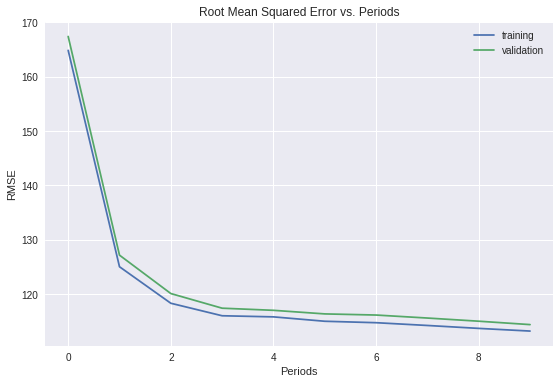

In [0]:
minimal_features = [
  "median_income",
  "latitude",
]

minimal_training_examples = training_examples[minimal_features]
minimal_validation_examples = validation_examples[minimal_features]

_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=minimal_training_examples,
    training_targets=training_targets,
    validation_examples=minimal_validation_examples,
    validation_targets=validation_targets)

## 任务2：更好的利用纬度

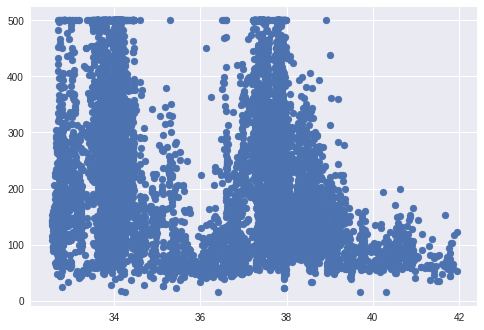

In [0]:
plt.scatter(training_examples["latitude"], training_targets["median_house_value"])

 **尝试创建一些能够更好地利用纬度的合成特征。**

例如，您可以创建某个特征，将 `latitude` 映射到值 `|latitude - 38|`，并将该特征命名为 `distance_from_san_francisco`。

或者，您可以将该空间分成 10 个不同的分桶（例如 `latitude_32_to_33`、`latitude_33_to_34` 等）：如果 `latitude` 位于相应分桶范围内，则显示值 `1.0`；如果不在范围内，则显示值 `0.0`。

使用相关矩阵来指导您构建合成特征；如果您发现效果还不错的合成特征，可以将其添加到您的模型中。

您可以获得的最佳验证效果是什么？

In [0]:
LATITUDE_RANGES = zip(range(32, 44), range(33, 45))

def select_and_transform_features(source_df):
  selected_examples = pd.DataFrame()
  selected_examples["median_income"] = source_df["median_income"]
  for r in LATITUDE_RANGES:
    selected_examples["latitude_%d_to_%d" % r] = source_df["latitude"].apply(
      lambda l: 1.0 if l >= r[0] and l < r[1] else 0.0)
  return selected_examples

selected_training_examples = select_and_transform_features(training_examples)
selected_validation_examples = select_and_transform_features(validation_examples)

In [0]:
_ = train_model(
    learning_rate=0.01,
    steps=500,
    batch_size=5,
    training_examples=selected_training_examples,
    training_targets=training_targets,
    validation_examples=selected_validation_examples,
    validation_targets=validation_targets)